<a href="https://colab.research.google.com/github/m73abbasi/CS-SBU-DataMining-Msc-projects/blob/main/New_yourk_sity_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New yourk sity airbnb

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import urllib
from geopy.distance import geodesic

In [3]:
# read data
ds = pd.read_csv('/content/drive/MyDrive/AB_NYC_2019.csv')
pd.set_option('display.max_columns',None)
ds.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# check number of recourd
ds.shape

(48895, 16)

In [5]:
# check information of data set
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# basic stat report from numeric data
ds[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
# check null data
ds.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
# delete columns with more than 50% null data
ds = ds.drop(columns = ds.columns[((ds.isna().sum()/len(ds))>0.50)])
ds.shape

(48895, 16)

In [9]:
# delet columns without useful information
ds = ds.drop(columns = ['id'])
ds.shape

(48895, 15)

In [10]:
ds['price'].value_counts().index

Int64Index([ 100,  150,   50,   60,  200,   75,   80,   65,   70,  120,
            ...
             559, 1899,  431, 4100,  805,  463,  266,  453, 1306, 1749],
           dtype='int64', length=674)

In [11]:
# data cleaning
ds = ds[ds['price']>0]
ds['price'].value_counts().index

Int64Index([ 100,  150,   50,   60,  200,   75,   80,   65,   70,  120,
            ...
             397,  454,  422, 1306, 1978, 2010, 1485,  822,  539, 1880],
           dtype='int64', length=673)

In [12]:
# fillna numeric data by mean
ds.fillna(ds._get_numeric_data().mean(),inplace=True)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48868 non-null  object 
 1   host_id                         48884 non-null  int64  
 2   host_name                       48863 non-null  object 
 3   neighbourhood_group             48884 non-null  object 
 4   neighbourhood                   48884 non-null  object 
 5   latitude                        48884 non-null  float64
 6   longitude                       48884 non-null  float64
 7   room_type                       48884 non-null  object 
 8   price                           48884 non-null  int64  
 9   minimum_nights                  48884 non-null  int64  
 10  number_of_reviews               48884 non-null  int64  
 11  last_review                     38833 non-null  object 
 12  reviews_per_month               

In [13]:
# normalizing numeric data
for cols in ds.columns:
  if ds[cols].dtype == 'int64' or ds[cols].dtype == 'float64':
    ds[cols] = ((ds[cols]-ds[cols].mean())/(ds[cols].std()))

In [14]:
# delete outlier
for cols in ds.columns:
  if ds[cols].dtype == 'int64' or ds[cols].dtype == 'float64':
    upper_range = ds[cols].mean() + 3 * ds[cols].std()
    lower_range = ds[cols].mean() - 3 * ds[cols].std()
    idx = ds[(ds[cols] > upper_range) | (ds[cols] < lower_range)].index
    ds = ds.drop(idx)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44118 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            44103 non-null  object 
 1   host_id                         44118 non-null  float64
 2   host_name                       44101 non-null  object 
 3   neighbourhood_group             44118 non-null  object 
 4   neighbourhood                   44118 non-null  object 
 5   latitude                        44118 non-null  float64
 6   longitude                       44118 non-null  float64
 7   room_type                       44118 non-null  object 
 8   price                           44118 non-null  float64
 9   minimum_nights                  44118 non-null  float64
 10  number_of_reviews               44118 non-null  float64
 11  last_review                     35015 non-null  object 
 12  reviews_per_month               

In [15]:
# reduce number of categories
for cols in ds.columns:
  if ds[cols].dtype == 'object' or ds[cols].dtype == 'bool':
    print('columns : {} , \n {}'.format(cols,ds[cols].value_counts()))

columns : name , 
 New york Multi-unit building                         13
Brooklyn Apartment                                   12
Loft Suite @ The Box House Hotel                     11
Private Room                                         11
Home away from home                                  10
                                                     ..
Gramercy Heaven, right off Park Ave                   1
Beautiful Pre-War on Prospect Park                    1
Studio Apartment in Herald Square                     1
Charm and cozy close to NY and La Guardia Airport     1
:Luxury 1BR by the water, one stop from Manhattan     1
Name: name, Length: 43242, dtype: int64
columns : host_name , 
 Michael             362
David               356
John                277
Alex                249
Sarah               219
                   ... 
Guilda                1
Genny                 1
TaSh                  1
Endy                  1
Eleanor & Kameon      1
Name: host_name, Length: 10692, dtype

In [16]:
# Which hosts are the busiest
ds['host_name'].value_counts().head(2)

Michael    362
David      356
Name: host_name, dtype: int64

In [17]:
# delete column that low importance
ds = ds.drop(columns=['neighbourhood'])
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44118 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            44103 non-null  object 
 1   host_id                         44118 non-null  float64
 2   host_name                       44101 non-null  object 
 3   neighbourhood_group             44118 non-null  object 
 4   latitude                        44118 non-null  float64
 5   longitude                       44118 non-null  float64
 6   room_type                       44118 non-null  object 
 7   price                           44118 non-null  float64
 8   minimum_nights                  44118 non-null  float64
 9   number_of_reviews               44118 non-null  float64
 10  last_review                     35015 non-null  object 
 11  reviews_per_month               44118 non-null  float64
 12  calculated_host_listings_count  

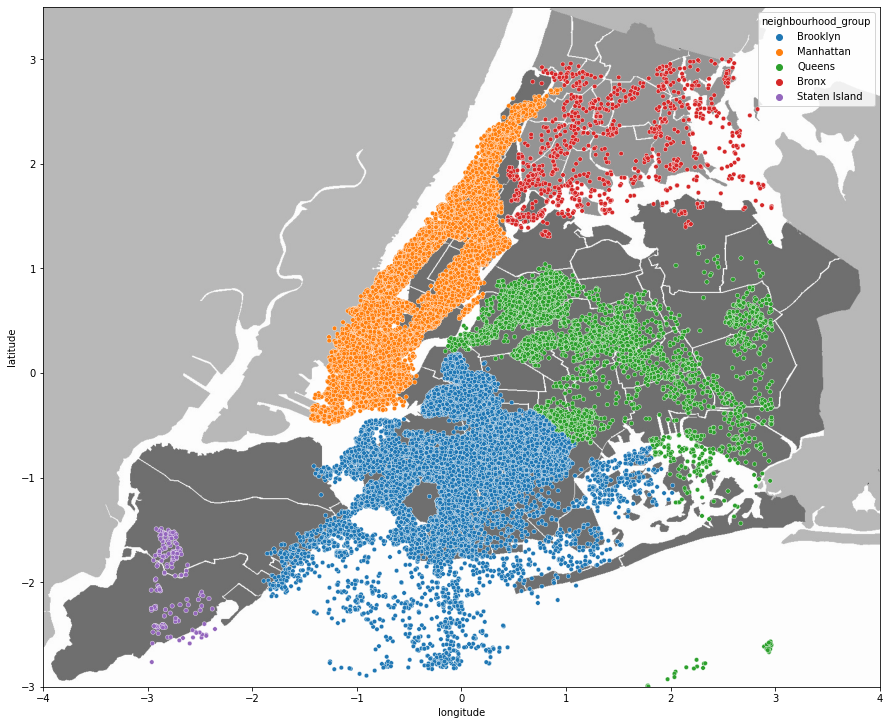

In [18]:
# Location of rental houses in different cities with scatterplot
plt.figure(figsize = (15,15))
img = plt.imread('//content/drive/MyDrive/New_York_City_.jpg')
plt.imshow(img,extent=[-4,4,-3,3.5])
sns.scatterplot(x=ds['longitude'],y=ds['latitude'],hue='neighbourhood_group',s=20,data=ds)
plt.show()

In [19]:
# Build a column called all_year_availability
ds['all_year_availability'] = 0
def edit(x):
  if x == 365:
    return 1
  else:
    return 0
ds['all_year_availability'] = ds['availability_365'].apply(edit)
ds['all_year_availability'].value_counts()

0    44118
Name: all_year_availability, dtype: int64

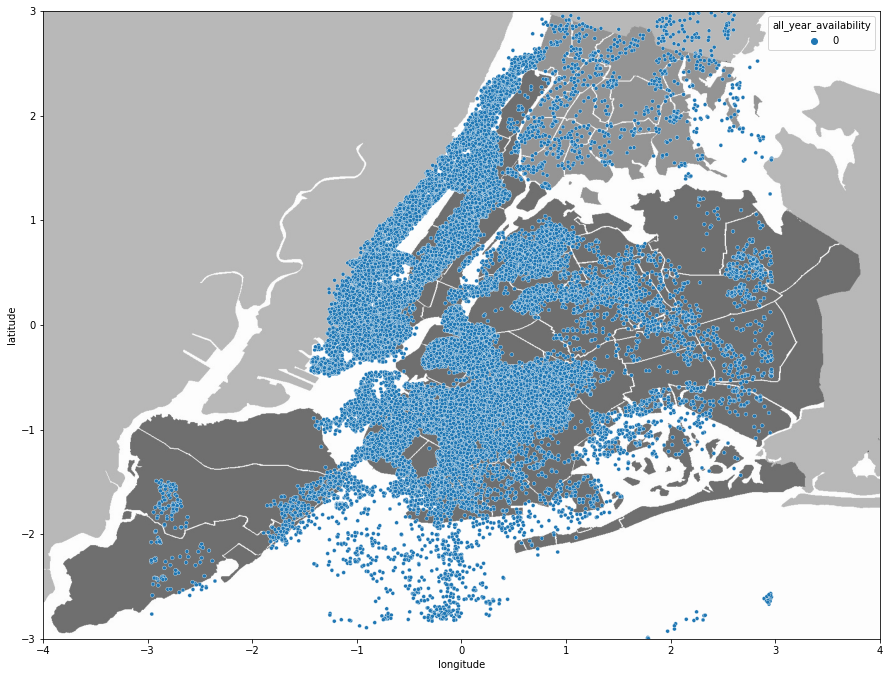

In [20]:
# Number of active houses on all days of the year with scatterplot
plt.figure(figsize = (15,15))
img = plt.imread('/content/drive/MyDrive/New_York_City_.jpg')
plt.imshow(img,extent=[-4,4,-3,3])
sns.scatterplot(x=ds['longitude'],y=ds['latitude'],hue='all_year_availability',s=15,data=ds)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


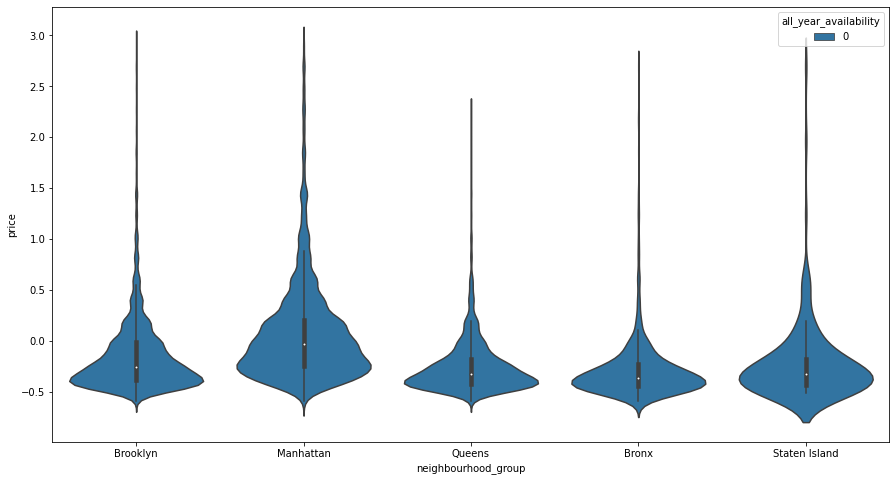

In [21]:
# relation between neighbourhood_group & price
plt.figure(figsize=(15,8))
sns.violinplot('neighbourhood_group','price', hue = 'all_year_availability' , data = ds)

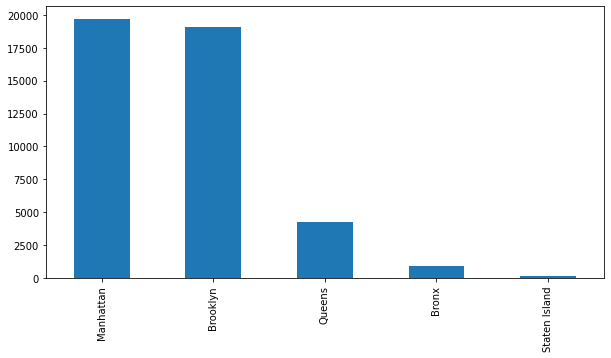

In [22]:
plt.figure(figsize=(10,5))
ds['neighbourhood_group'].value_counts().plot(kind='bar')

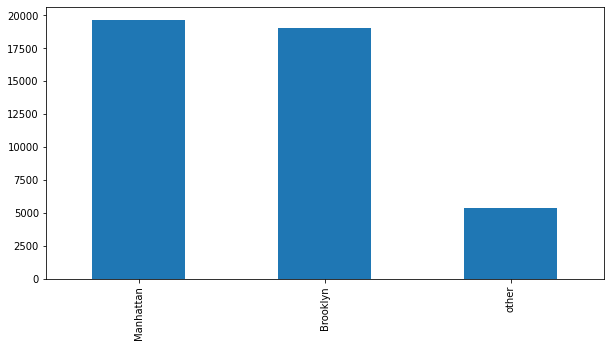

In [23]:
# Merge several small values ​​from column neighbourhood_group
others = list(ds['neighbourhood_group'].value_counts().tail(3).index)
def edit_neighbourhood_group(x):
  if x in others:
    return 'other'
  else:
    return x
ds['neighbourhood_group_edit']=ds['neighbourhood_group'].apply(edit_neighbourhood_group)
ds = ds.drop(columns=['neighbourhood_group'])
ds['neighbourhood_group_edit'].value_counts()*100/len(ds)
plt.figure(figsize=(10,5))
ds['neighbourhood_group_edit'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


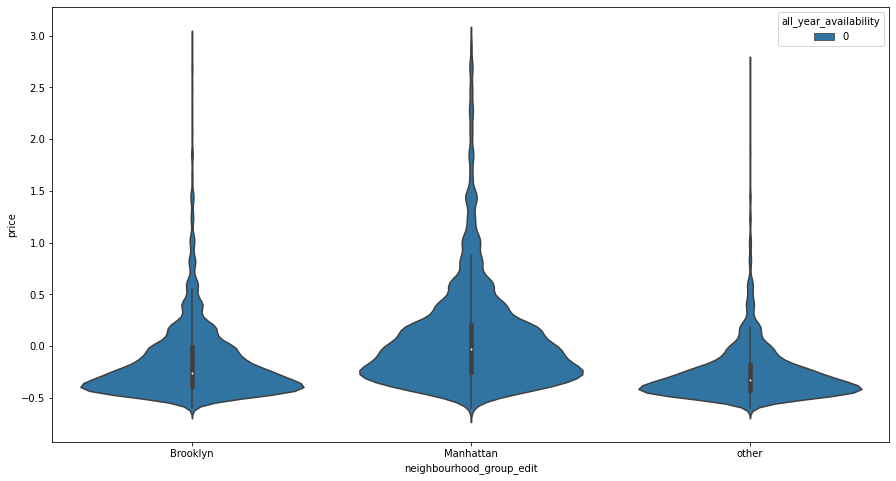

In [24]:
# relation between neighbourhood_group_edit & price
plt.figure(figsize=(15,8))
sns.violinplot('neighbourhood_group_edit','price', hue = 'all_year_availability' , data = ds)

In [25]:
ds['calculated_host_listings_count'].value_counts()

-0.186448    30081
-0.156105     5885
-0.125762     2438
-0.095418     1220
-0.065075      702
-0.034732      479
 0.025955      389
-0.004388      335
 0.056298      217
 0.086641      193
 2.696167      192
 0.147328      155
 0.177671      120
 1.361061      104
 2.908570      103
 0.784538       99
 1.270031       94
 2.544450       91
 2.423077       87
 0.116985       86
 0.238358       74
 0.208015       70
 0.481105       69
 0.299045       68
 0.814881       68
 1.755524       63
 0.723851       61
 0.632821       52
 1.300374       50
 0.541791       50
 1.209344       47
 0.329388       44
 0.390075       40
 0.966598       38
 0.905911       37
 1.087971       35
 0.754194       32
 0.693508       29
 0.663164       29
 0.602478       27
 0.572135       26
 0.420418       21
 0.268701       16
 0.359731        2
Name: calculated_host_listings_count, dtype: int64

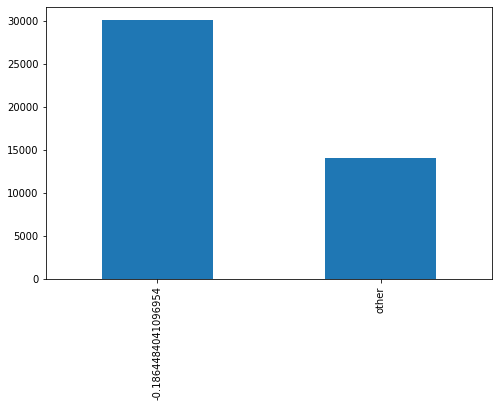

In [26]:
# Merge several small values ​​from column calculated_host_listings_count
others = list(ds['calculated_host_listings_count'].value_counts().tail(43).index)
def edit_calculated_host_listings_count(x):
  if x in others:
    return 'other'
  else:
    return x
ds['calculated_host_listings_count_edit']=ds['calculated_host_listings_count'].apply(edit_calculated_host_listings_count)
ds = ds.drop(columns=['calculated_host_listings_count'])
ds['calculated_host_listings_count_edit'].value_counts()*100/len(ds)
plt.figure(figsize=(8,5))
ds['calculated_host_listings_count_edit'].value_counts().plot(kind='bar')

In [27]:
# T-Test for price
stats.ttest_rel(ds['all_year_availability'] , ds['price'])

Ttest_relResult(statistic=27.146417204116233, pvalue=5.904176668052012e-161)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


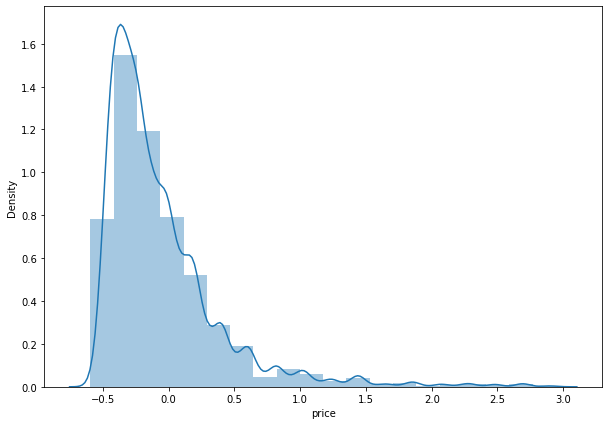

In [28]:
# check distribution of price
plt.figure(figsize=(10,7))
sns.distplot(ds['price'],bins=20)

In [29]:
# transfer price (to ln price) to make the disk normal
ds['price_log_e'] = np.log(ds['price'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
stats.normaltest(ds['price_log_e'])

NormaltestResult(statistic=nan, pvalue=nan)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


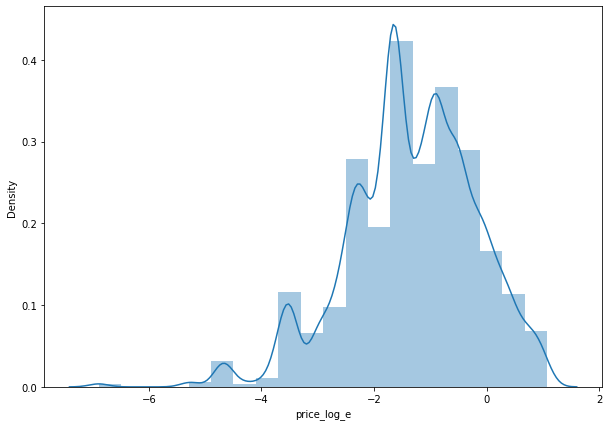

In [31]:
# check distribution of price_log_e
plt.figure(figsize=(10,7))
sns.distplot(ds['price_log_e'],bins=20)

In [32]:
# T-Test for price_log_e
stats.ttest_rel(ds['all_year_availability'] , ds['price_log_e'])

Ttest_relResult(statistic=nan, pvalue=nan)

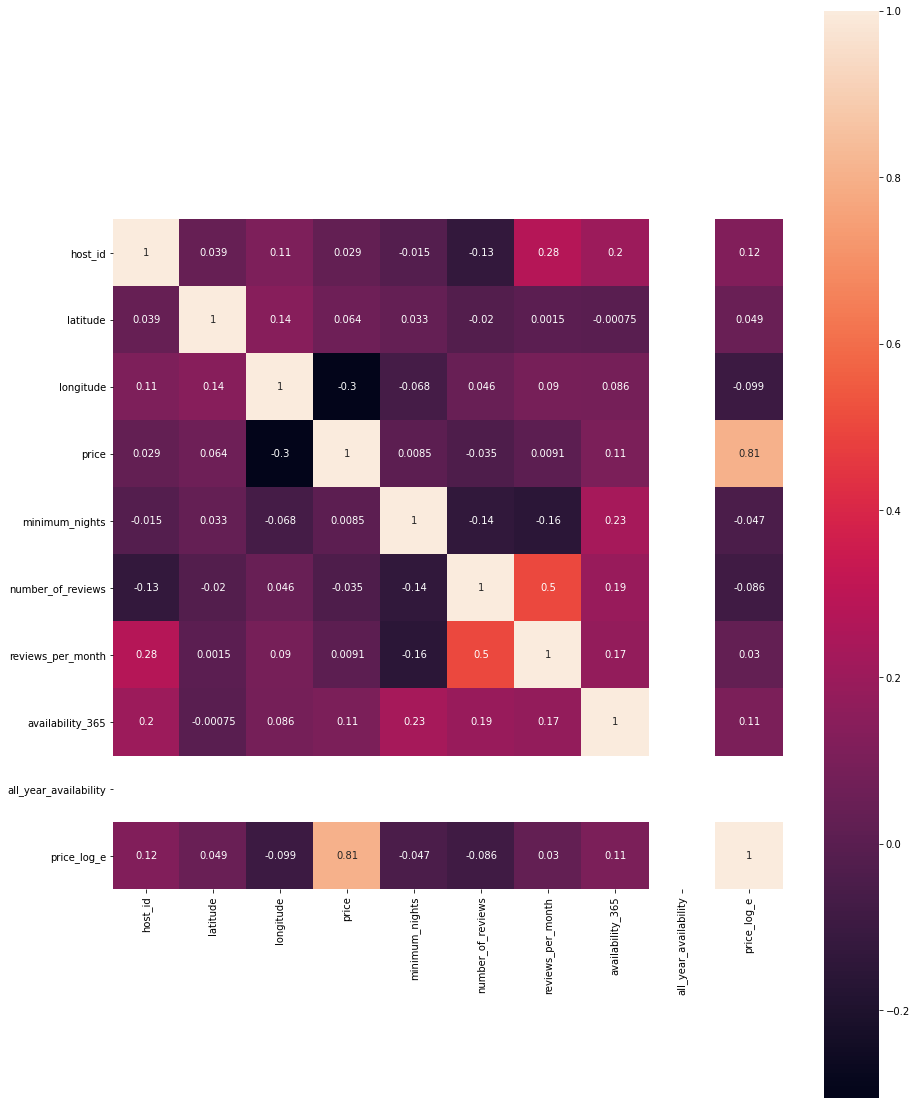

In [33]:
# correlation matrix
corre = ds.corr()
y , x = plt.subplots(figsize=(15,20))
sns.heatmap(corre , square = True , annot = True)

In [34]:
# split future and target
y = ds['price']
x = ds.drop(columns = ['price'])
print('x.shape =' , x.shape)
print('y.shape =' , y.shape)

x.shape = (44118, 15)
y.shape = (44118,)
